<a href="https://www.kaggle.com/ebongoa/matrice-de-d-cision-augmentation-des-donn-es?scriptVersionId=87905330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
        # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os

# Get the file details
directory = []
file = []
title = []
text = []
label = []
datapath = '../input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/' 
for dirname, _ , filenames in os.walk(datapath):
    
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('/')[-1])
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)# Get the file details

In [3]:
import pandas as pd
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)), 
               columns =['directory', 'file', 'title', 'text', 'label'])
fulldf.head(5)

df = fulldf.filter(['text', 'label'], axis=1)
df.head()

,text,label
0,Gordon Brown will seek to put the economy at...,politics
1,Military chiefs are expected to meet to make...,politics
2,Michael Howard has denied his shadow cabinet...,politics
3,Ministers will invite international observer...,politics
4,Ex-chat show host Robert Kilroy-Silk is to c...,politics


## **Randomisation**

In [4]:
!pip install nlpaug
!pip install textaugment
!pip install augmenty

     |████████████████████████████████| 410 kB 618 kB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 55 kB 501 kB/s            
     |████████████████████████████████| 42 kB 673 kB/s            
     |████████████████████████████████| 58 kB 1.7 MB/s            
     |████████████████████████████████| 1.3 MB 2.8 MB/s            
     |████████████████████████████████| 133 kB 39.9 MB/s            
     |████████████████████████████████| 65 kB 2.3 MB/s             
     |████████████████████████████████| 53 kB 1.3 MB/s             
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=ae6a7d7956962d9d178b46599deeef9c1bd955e6e12459bd6b72da44573a6082
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.13.0
    Uninstalling h11-0.13.0:
      Successf

In [5]:
import nlpaug.augmenter.word as naw
from textaugment import EDA
import augmenty

In [6]:
import time
import spacy

In [7]:
text = df.iloc[0]['text']
text

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [8]:
X = ['NLPAug', 'TextAugment', 'Augmenty']
y = []

start = time.time()
aug = naw.RandomWordAug()
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

start = time.time()
aug = EDA()
augmented_text = aug.random_insertion(text)
print(augmented_text)
end = time.time()
y.append(end-start)

nlp = spacy.load("en_core_web_sm")
start = time.time()
aug = augmenty.load("token_insert_random.v1", level =1.00)
augmented_texts = augmenty.texts([text], aug, nlp)
for augmented_text in augmented_texts:
    print(augmented_text)
end = time.time()
y.append(end-start)

Gordon Brown will seek to put the economy at the centre of ' s bid for a term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £ 60, 000. But the Conservatives and Lib Dems insist voters face higher taxes and more means - testing under Labour. Treasury officials have there will not be a pre - election giveaway, but Mr Brown is thought to have about £ 2bn to spare. - Increase in the stamp duty threshold from £ 60, 000 - A freeze petrol duty - An extension of tax credit scheme for poorer families - Possible help for The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties ' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding duty, with close to half a million properties, in England an

In [9]:
# list(augmenty.augmenters())

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Comparaison de la randomisation sur le temps')

<Figure size 1080x576 with 0 Axes>

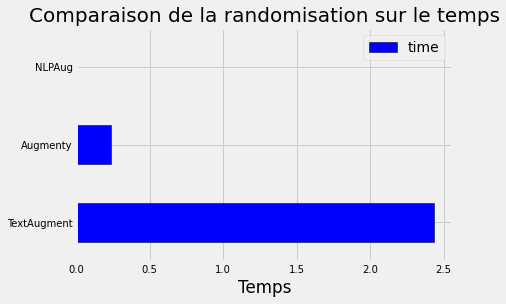

In [11]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': y})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = 'time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Temps')
plt.xticks(size = 10)
plt.title('Comparaison de la randomisation sur le temps', size=20)                            

## **Casse du document**

In [12]:
import augmenty

In [13]:
import time
import spacy

In [14]:
text = df.iloc[0]['text']
text

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [15]:
X = ['Augmenty']
y = []

nlp = spacy.load("en_core_web_sm")
start = time.time()
aug = augmenty.load("spacy.lower_case.v1", level =1.00)
augmented_texts = augmenty.texts([text], aug, nlp)
for augmented_text in augmented_texts:
    print(augmented_text)
end = time.time()
y.append(end-start)

  gordon brown will seek to put the economy at the centre of labour's bid for a third term in power when he delivers his ninth budget at 1230 gmt. he is expected to stress the importance of continued economic stability, with low unemployment and interest rates. the chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. but the conservatives and lib dems insist voters face higher taxes and more means-testing under labour.  treasury officials have said there will not be a pre-election giveaway, but mr brown is thought to have about £2bn to spare.  - increase in the stamp duty threshold from £60,000   - a freeze on petrol duty   - an extension of tax credit scheme for poorer families   - possible help for pensioners the stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half

In [16]:
list(augmenty.augmenters())

['spacy.orth_variants.v1',
 'spacy.lower_case.v1',
 'random_casing.v1',
 'char_replace_random.v1',
 'char_replace.v1',
 'keystroke_error.v1',
 'remove_spacing.v1',
 'char_swap.v1',
 'random_starting_case.v1',
 'conditional_token_casing.v1',
 'token_dict_replace.v1',
 'wordnet_synonym.v1',
 'token_replace.v1',
 'word_embedding.v1',
 'grundtvigian_spacing_augmenter.v1',
 'spacing_insertion.v1',
 'token_swap.v1',
 'token_insert.v1',
 'token_insert_random.v1',
 'duplicate_token.v1',
 'random_synonym_insertion.v1',
 'ents_replace.v1',
 'per_replace.v1',
 'ents_format.v1',
 'upper_case.v1',
 'spongebob.v1',
 'da_æøå_replace.v1',
 'da_historical_noun_casing.v1']

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Comparaison de la casse sur le temps')

<Figure size 1080x576 with 0 Axes>

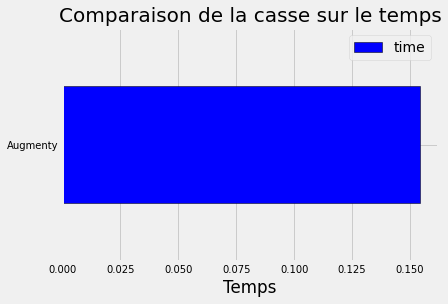

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': y})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = 'time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Temps')
plt.xticks(size = 10)
plt.title('Comparaison de la casse sur le temps', size=20)   

## **Synonyme**

In [19]:
import nlpaug.augmenter.word as naw
from textaugment import Wordnet
import augmenty

In [20]:
import time
import spacy

In [21]:
text = df.iloc[0]['text']
text

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [22]:
X = ['NLPAug', 'TextAugment', 'Augmenty']
y = []

start = time.time()
aug = naw.SynonymAug()
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

start = time.time()
aug = Wordnet()
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

nlp = spacy.load("en_core_web_sm")
start = time.time()
aug = augmenty.load("wordnet_synonym.v1", level =1.00)
augmented_texts = augmenty.texts(text, aug, nlp)
for augmented_text in augmented_texts:
    print(augmented_text)
end = time.time()
y.append(end-start)

Gordon Brown will seek to put the economy at the centre of Labour ' s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £ 60, 000. But the Conservatives and Lib Dems insist voters face higher taxes and more means - testing under Labour. Treasury officials have said there will not be a pre - election giveaway, but Mr Brown constitute thought to have about £ 2bn to spare. - Increase in the stamp duty threshold from £ 60, 000 - A freeze on gas duty - An extension of tax credit scheme for poorer families - Possible help for pensionary The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the principal parties ' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with c

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Comparaison de la synonymisation sur le temps')

<Figure size 1080x576 with 0 Axes>

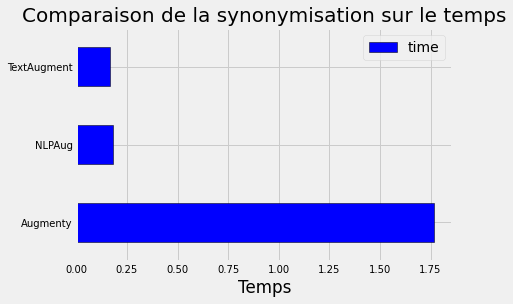

In [24]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': y})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = 'time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Temps')
plt.xticks(size = 10)
plt.title('Comparaison de la synonymisation sur le temps', size=20)  

## **Prise en compte des erreurs**

In [25]:
import nlpaug.augmenter.word as naw

In [26]:
import time

In [27]:
text = df.iloc[0]['text']
text

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [28]:
X = ['NLPAug']
y = []

start = time.time()
aug = naw.SpellingAug()
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

Gordon Brown will seek to put the economy at the centre of Labour ' s bid for a third term in powder. when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £ 60, 000. But the Conservatives and Lib Dems insist voters face higher taxes and more means - testing under Labour. Treasury officials have said there will not be a pre - election giveaway, but mr Brown is thought to have about £ 2bn to spare. - Increase in the stamp duty threshold from £ 60, 000 - A freeze on petrol duty - An extension of tax credit scheme for poorer families - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main partys ' general ellection manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to 

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Comparaison des fautes orthographe sur le temps')

<Figure size 1080x576 with 0 Axes>

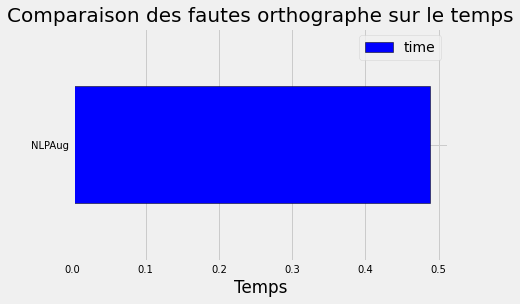

In [30]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': y})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = 'time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Temps')
plt.xticks(size = 10)
plt.title('Comparaison des fautes orthographe sur le temps', size=20)  

## **Encastrement des mots**

In [31]:
import nlpaug.augmenter.word as naw
from textaugment import Word2vec

In [32]:
import time

In [33]:
text = df.iloc[0]['text']
text

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [34]:
from gensim.models import Word2Vec

In [35]:
X = ['NLPAug', 'TextAugment']
y = []

aug = naw.ContextualWordEmbsAug(model_type='bert')
start = time.time()
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

word2vec = Word2Vec()
start = time.time()
aug = Word2vec(model=word2vec)
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

gordon brown will seek to put this economy at the centre of labour's bid for a third term in power when he delivers his ninth budget at 1230 gmt. he is expected to stress the importance of continued economic stability, with low unemployment and interest rates. the chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60, 000. but the conservatives and lib dems insist voters face higher taxes and more means - testing under labour. treasury officials have said there will not be a pre - election giveaway, but mr brown is thought to have about £2bn to spare. - increase in the stamp duty threshold from £60, 000 - a freeze on petrol duty - an extension of tax credit scheme for poorer families - possible help for pensioners the stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties'general election manifestos. ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a m

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

['NLPAug', 'TextAugment'] [24.326390504837036, 0.0035581588745117188]


<Figure size 1080x576 with 0 Axes>

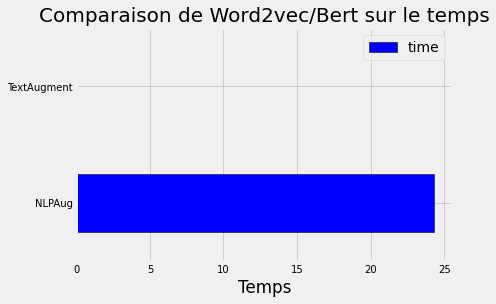

In [37]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': y})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = 'time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Temps')
plt.xticks(size = 10)
plt.title('Comparaison de Word2vec/Bert sur le temps', size=20)  

print(X, y)

## **Back Translation**

In [38]:
import nlpaug.augmenter.word as naw
from textaugment import Translate

In [39]:
import time

In [40]:
text = df.iloc[0]['text']
text

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [41]:
X = ['NLPAug', 'TextAugment']
y = []

aug = naw.BackTranslationAug()
start = time.time()
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)


start = time.time()
aug = Translate(src="en", to="fr")
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308k [00:00<?, ?B/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Gordon Brown will try to put the economy at the heart of Labour's bid for a third term in power when he presents his ninth budget at 1230 BST. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. It is expected that the Chancellor will freeze fuel duty and raise the £60,000 threshold for s

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

['NLPAug', 'TextAugment'] [85.34544515609741, 1.363633394241333]


<Figure size 1080x576 with 0 Axes>

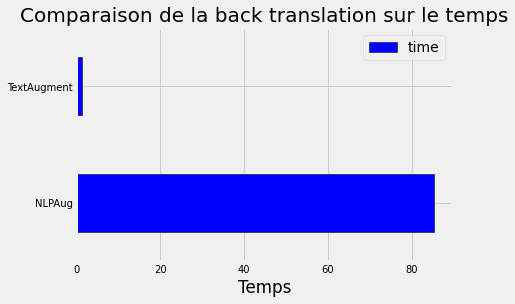

In [43]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': y})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = 'time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Temps')
plt.xticks(size = 10)
plt.title('Comparaison de la back translation sur le temps', size=20)

print(X, y)

 ## **Résumé du texte**

In [44]:
import nlpaug.augmenter.sentence as nas

In [45]:
import time

In [46]:
text = df.iloc[0]['text']
text

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [47]:
X = ['NLPAug']
y = []

aug = nas.AbstSummAug()
start = time.time()
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (691 > 512). Running this sequence through the model will result in indexing errors


chancellor expected to freeze petrol duty and raise stamp duty threshold from £60,000. tories and lib dems insist voters face higher taxes and more means-testing.


In [48]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Comparaison du résumé sur le temps')

<Figure size 1080x576 with 0 Axes>

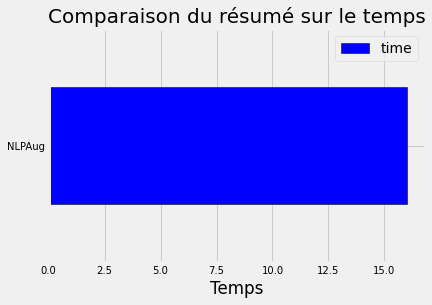

In [49]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': y})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = 'time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Temps')
plt.xticks(size = 10)
plt.title('Comparaison du résumé sur le temps', size=20)

## **Modèles de prédiction automatique de phrases**

In [50]:
import nlpaug.augmenter.sentence as nas

In [51]:
import time

In [52]:
text = df.iloc[0]['text']
text

'  Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to h

In [53]:
X = ['NLPAug']
y = []

aug = nas.ContextualWordEmbsForSentenceAug()
start = time.time()
augmented_text = aug.augment(text)
print(augmented_text)
end = time.time()
y.append(end-start)

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from £60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.  Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about £2bn to spare.  - Increase in the stamp duty threshold from £60,000   - A freeze on petrol duty   - An extension of tax credit scheme for poorer families   - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Comparaison de la prédiction des phrases sur le temps')

<Figure size 1080x576 with 0 Axes>

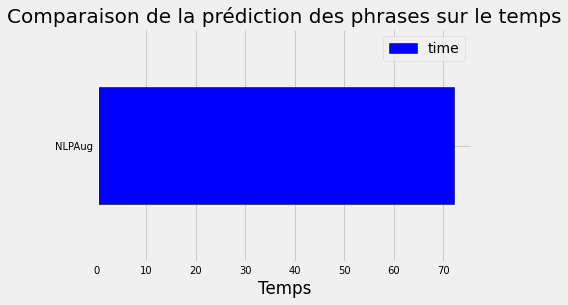

In [55]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (15, 8))

model_comparison = pd.DataFrame({'model': X,'time': y})
model_comparison.sort_values('time', ascending = False).plot(x = 'model', y = 'time', kind = 'barh', color = 'blue', edgecolor = 'black')

plt.ylabel('')
plt.yticks(size = 10)
plt.xlabel('Temps')
plt.xticks(size = 10)
plt.title('Comparaison de la prédiction des phrases sur le temps', size=20)